In [3]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup


from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options


In [6]:
url = 'https://www.houzeo.com/homes-for-sale/california/orange-county'
r = requests.get(url)
print(r.status_code)

200


In [11]:
chrome_options = Options()
chrome_options.add_argument('--headless')

# Path to your ChromeDriver
webdriver_service = Service('/Users/samantharichardson/Desktop/chromedriver')  # Update with the actual path to your chromedriver

# Set up the WebDriver
driver = webdriver.Chrome(service=webdriver_service, options=chrome_options)

# Go to the webpage
driver.get('https://houzeo.com/homes-for-sale/california/orange-county')

# Allow the page to fully load
driver.implicitly_wait(10)

# Find all the house listings using the class name 'innerproperty-wrap'
house_listings = driver.find_elements(By.CLASS_NAME, 'propertyCardBox')
print(house_listings)

# Loop through each house listing and extract the relevant details
for house in house_listings:
    try:
        # Extract price, address, etc. using find_element or find_elements
        price = house.find_element(By.CLASS_NAME, 'leftPrice').text
        address = house.find_element(By.CLASS_NAME, 'addressText').text
        city = address.split(",")[1].strip()
        specs = house.find_element(By.CLASS_NAME, 'rightSpecs')
        spec_details = specs.find_elements(By.TAG_NAME, 'p')  # Get all the <p> tags inside 'right-specs'
        beds = spec_details[0].text if len(spec_details) > 0 else "N/A"
        baths = spec_details[1].text if len(spec_details) > 1 else "N/A"
        sqft = spec_details[2].text if len(spec_details) > 2 else "N/A"

        # Print or store the details
        print(f'Price: {price}')
        print(f'Address: {address}')
        print(f"City: {city}")
        print(f'Beds: {beds}')
        print(f"Baths: {baths}")
        print(f"Square Feet: {sqft}")
        print('-' * 40)

    except Exception as e:
        # Handle cases where certain elements might be missing
        print(f"Error scraping house: {e}")
        continue

# Close the browser
driver.quit()

[<selenium.webdriver.remote.webelement.WebElement (session="464ac177bb94cf4c03b4a570eb6bd387", element="f.18F9DF2A4C9FA567A668107AC283DEB5.d.E9A66503C408AB53086EFBE487D9A506.e.544")>, <selenium.webdriver.remote.webelement.WebElement (session="464ac177bb94cf4c03b4a570eb6bd387", element="f.18F9DF2A4C9FA567A668107AC283DEB5.d.E9A66503C408AB53086EFBE487D9A506.e.545")>, <selenium.webdriver.remote.webelement.WebElement (session="464ac177bb94cf4c03b4a570eb6bd387", element="f.18F9DF2A4C9FA567A668107AC283DEB5.d.E9A66503C408AB53086EFBE487D9A506.e.546")>, <selenium.webdriver.remote.webelement.WebElement (session="464ac177bb94cf4c03b4a570eb6bd387", element="f.18F9DF2A4C9FA567A668107AC283DEB5.d.E9A66503C408AB53086EFBE487D9A506.e.547")>, <selenium.webdriver.remote.webelement.WebElement (session="464ac177bb94cf4c03b4a570eb6bd387", element="f.18F9DF2A4C9FA567A668107AC283DEB5.d.E9A66503C408AB53086EFBE487D9A506.e.548")>, <selenium.webdriver.remote.webelement.WebElement (session="464ac177bb94cf4c03b4a570e

IMPORTANT CODE

In [41]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

chrome_options = Options()
chrome_options.add_argument('--headless')

# Path to your ChromeDriver
webdriver_service = Service('/Users/samantharichardson/Desktop/chromedriver')  # Update with the actual path to your chromedriver

# Set up the WebDriver
driver = webdriver.Chrome(service=webdriver_service, options=chrome_options)

# Go to the webpage
driver.get('https://houzeo.com/homes-for-sale/california/orange-county')

houses_data = []
page_count = 0


while True:
    try:
        page_count += 1

        # Wait for the house listings to be visible
        WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located((By.CLASS_NAME, 'propertyCardBox')))
        
        # Find all the house listings using the class name 'innerproperty-wrap'
        house_listings = driver.find_elements(By.CLASS_NAME, 'propertyCardBox')
        # Loop through each house listing and extract the relevant details
        print(house_listings)
        for house in house_listings:
            try:
                price = house.find_element(By.CLASS_NAME, 'leftPrice').text
                address = house.find_element(By.CLASS_NAME, 'addressText').text
                
                city = address.split(",")[1].strip() if "," in address else "N/A"

                specs = house.find_element(By.CLASS_NAME, 'rightSpecs')
                spec_details = specs.find_elements(By.TAG_NAME, 'p')

                beds = spec_details[0].text if len(spec_details) > 0 else "N/A"
                baths = spec_details[1].text if len(spec_details) > 1 else "N/A"
                sqft = spec_details[2].text if len(spec_details) > 2 else "N/A"

                # Create a dictionary for the current house
                house_info = {
                    'Price': price,
                    'Address': address,
                    'City': city,
                    'Beds': beds,
                    'Baths': baths,
                    'Square Feet': sqft
                }
                houses_data.append(house_info)

            except Exception as e:
                print(f"Error scraping house: {e}")
                continue

        if page_count >= 15:
            print("Reached the 7th page, stopping pagination.")
            break

        next_button = driver.find_element(By.CSS_SELECTOR, 'li.page-item.nextDiv')
        next_button.click()
        # Wait for the next page to load
        time.sleep(3)

    except Exception as e:
        print(f"Error navigating pages: {e}")
        break

houses_df = pd.DataFrame(houses_data)
print(houses_df)
driver.quit()

Scraping page 1
[<selenium.webdriver.remote.webelement.WebElement (session="12223cd925088e9883c406b4ea3bcd57", element="f.A789D77973B4812A780A586AB5A85260.d.F00463B89C93D2E7E2ECEFD038298BF2.e.548")>, <selenium.webdriver.remote.webelement.WebElement (session="12223cd925088e9883c406b4ea3bcd57", element="f.A789D77973B4812A780A586AB5A85260.d.F00463B89C93D2E7E2ECEFD038298BF2.e.549")>, <selenium.webdriver.remote.webelement.WebElement (session="12223cd925088e9883c406b4ea3bcd57", element="f.A789D77973B4812A780A586AB5A85260.d.F00463B89C93D2E7E2ECEFD038298BF2.e.550")>, <selenium.webdriver.remote.webelement.WebElement (session="12223cd925088e9883c406b4ea3bcd57", element="f.A789D77973B4812A780A586AB5A85260.d.F00463B89C93D2E7E2ECEFD038298BF2.e.551")>, <selenium.webdriver.remote.webelement.WebElement (session="12223cd925088e9883c406b4ea3bcd57", element="f.A789D77973B4812A780A586AB5A85260.d.F00463B89C93D2E7E2ECEFD038298BF2.e.552")>, <selenium.webdriver.remote.webelement.WebElement (session="12223cd92

CLEAN THE DATA

In [24]:
print(houses_df)

Empty DataFrame
Columns: [Price, Address, City, Beds, Baths, Square Feet]
Index: []


In [23]:
clean_houses_df = houses_df.copy()

# Function to clean the price column
def clean_price(price):
    if isinstance(price, (int, float)):
        return int(price)
    elif isinstance(price, str):
        cleaned_price = price.replace('$', '').replace(',', '').strip()
        try:
            return int(float(cleaned_price))
        except ValueError:
            print(f"Invalid price format detected: {price}. Setting to None.")
            return None
    else:
        print(f"Unexpected data type for price: {price}. Setting to None.")
        return None

# Function to extract and convert the number of beds/baths
def clean_beds_baths(value):
    if isinstance(value, (int, float)):  # If the value is already numeric, return it as an integer
        return int(value)
    elif isinstance(value, str):  # If it's a string, split and convert to integer
        try:
            return int(value.split()[0])
        except (ValueError, IndexError):
            print(f"Invalid beds/baths format detected: {value}. Setting to None.")
            return None
    else:
        print(f"Unexpected data type for beds/baths: {value}. Setting to None.")
        return None

# Function to clean square feet
def clean_sqft(value):
    if isinstance(value, (int, float)):
        return int(value)
    elif isinstance(value, str):
        cleaned_sqft = value.replace('sqft', '').replace(',', '').strip()
        try:
            return int(cleaned_sqft)
        except ValueError:
            print(f"Invalid square feet format detected: {value}. Setting to None.")
            return None
    else:
        print(f"Unexpected data type for square feet: {value}. Setting to None.")
        return None

clean_houses_df['Price'] = clean_houses_df['Price'].apply(clean_price)
clean_houses_df['Beds'] = clean_houses_df['Beds'].apply(clean_beds_baths)
clean_houses_df['Baths'] = clean_houses_df['Baths'].apply(clean_beds_baths)
clean_houses_df['Square Feet'] = clean_houses_df['Square Feet'].apply(clean_sqft)

# Drop rows where any of the key columns are None
clean_houses_df = clean_houses_df.dropna(subset=['Price', 'Beds', 'Baths', 'Square Feet'])

# Display the cleaned DataFrame
print(clean_houses_df)

# Optionally, save the cleaned DataFrame to a new CSV file
clean_houses_df.to_csv('cleaned_orange_county_houses.csv', index=False)


Empty DataFrame
Columns: [Price, Address, City, Beds, Baths, Square Feet]
Index: []


CLEANED THAT IM USING

In [2]:
import pandas as pd

# Load the CSV file into a DataFrame
houses_df = pd.read_csv("orange_county_houses.csv")

# Create a copy of the DataFrame for cleaning
clean_houses_df = houses_df.copy()

# Function to clean the price column
def clean_price(price):
    if isinstance(price, (int, float)):
        return int(price)
    elif isinstance(price, str):
        cleaned_price = price.replace('$', '').replace(',', '').strip()
        try:
            return int(float(cleaned_price))
        except ValueError:
            print(f"Invalid price format detected: {price}. Setting to None.")
            return None
    else:
        print(f"Unexpected data type for price: {price}. Setting to None.")
        return None

# Function to extract and convert the number of beds/baths
def clean_beds_baths(value):
    if pd.isna(value):  # Check if the value is NaN
        return None
    elif isinstance(value, (int, float)):
        return int(value)
    elif isinstance(value, str):
        try:
            return int(value.split()[0])
        except (ValueError, IndexError):
            print(f"Invalid beds/baths format detected: {value}. Setting to None.")
            return None
    else:
        print(f"Unexpected data type for beds/baths: {value}. Setting to None.")
        return None

# Function to clean square feet
def clean_sqft(value):
    if pd.isna(value):  # Check if the value is NaN
        return None
    elif isinstance(value, (int, float)):
        return int(value)
    elif isinstance(value, str):
        cleaned_sqft = value.replace('sqft', '').replace(',', '').strip()
        try:
            return int(cleaned_sqft)
        except ValueError:
            print(f"Invalid square feet format detected: {value}. Setting to None.")
            return None
    else:
        print(f"Unexpected data type for square feet: {value}. Setting to None.")
        return None

# Apply the cleaning functions to the DataFrame
clean_houses_df['Price'] = clean_houses_df['Price'].apply(clean_price)
clean_houses_df['Beds'] = clean_houses_df['Beds'].apply(clean_beds_baths)
clean_houses_df['Baths'] = clean_houses_df['Baths'].apply(clean_beds_baths)
clean_houses_df['Square Feet'] = clean_houses_df['Square Feet'].apply(clean_sqft)

# Drop rows where any of the key columns are None
clean_houses_df = clean_houses_df.dropna(subset=['Price', 'Beds', 'Baths', 'Square Feet'])

# Display the cleaned DataFrame (optional)
print(clean_houses_df)

# Save the cleaned DataFrame to a new CSV file
clean_houses_df.to_csv('cleaned_houses.csv', index=False)

        

Invalid beds/baths format detected: -- bds. Setting to None.
       Price                                            Address  \
0    1690000          3053 W Coolidge Avenue, Anaheim, CA 92801   
1     430000  1345 Cabrillo Park Drive # K12, Santa Ana, CA ...   
2     634900  409 Utica Avenue # A8, Huntington Beach, CA 92648   
4    1549000     19585 Oakdale Lane, Huntington Beach, CA 92648   
5    1695000            19 Corte Rivera, San Clemente, CA 92673   
..       ...                                                ...   
495   995000       10582 Geraldine Road, Garden Grove, CA 92840   
496  1985000        213 Avenida Lobeiro, San Clemente, CA 92672   
497  2298888                        52 Lupari, Irvine, CA 92618   
498   839999  27172 Calle Caballero # A, San Juan Capistrano...   
499  1440000   11280 Twinspan Avenue, Fountain Valley, CA 92708   

                    City  Beds  Baths  Square Feet  
0                Anaheim   9.0    5.0       4571.0  
1              Santa Ana   1

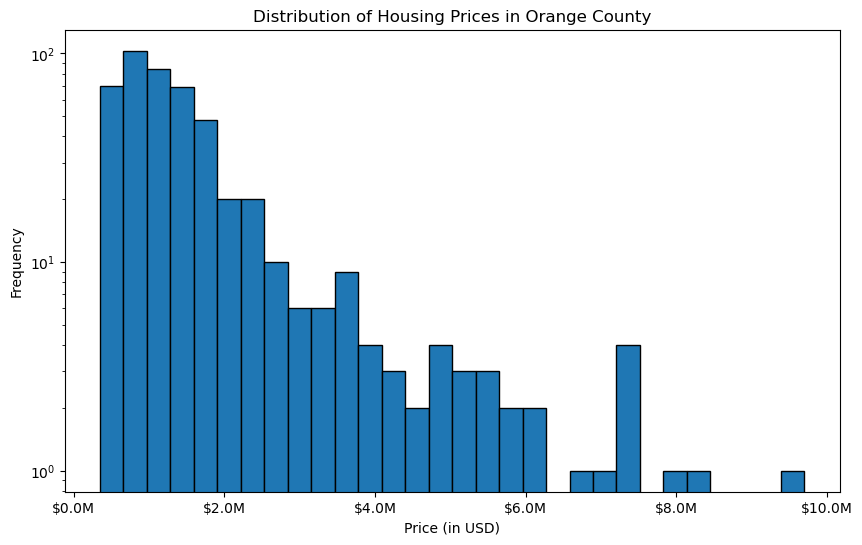

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mticker

df = pd.read_csv('cleaned_houses.csv')
df.head()

filtered_df = df[(df['Price'] > 100000) & (df['Price'] < 10000000)]

# Plot histogram of the 'Price' column
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['Price'], bins=30, edgecolor='black')
plt.title('Distribution of Housing Prices in Orange County')
plt.xlabel('Price (in USD)')
plt.ylabel('Frequency')
plt.yscale('log')  # Use log scale for better visibility of the distribution
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x*1e-6:.1f}M'))
plt.show()

